In [1]:
%load_ext autoreload
%autoreload 2

import sys

# implementation of reverse_shuffle
sys.path.insert(0, "/Users/user/git/eli5/")
import eli5

sys.path.insert(0, "/Users/user/git/datasci")
from sci.metrics import rmse, rmse_score, neg_rmse_score
import sci.plots as scip
import sci.learn as scil

%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10, 6)


import scikitplot as skplt

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
pd.set_option('display.float_format', lambda x: '{:.5f}'.format(x)) #Limiting floats output to 3 decimal points
pd.options.display.max_rows = 1000

random_state = 7

modified eli5
modified PermutationImportance sklearn


/Users/user/miniconda3/envs/test2/lib/python3.6/site-packages/lightgbm/__init__.py:46: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.1) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


## Load Data

In [2]:
data = scil.load_data("processed_min", random_state=random_state)

print("train:", data.X_train.shape)
print("test:", data.X_test.shape)

(250, 300) (250,)
train: (200, 300)
test: (50, 300)


## Choose Model

In [3]:
from sklearn.model_selection import *

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.linear_model import *
from sklearn import svm
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.kernel_ridge import KernelRidge
from sklearn.ensemble import *
from sklearn.ensemble import RandomForestClassifier

import xgboost
from xgboost import XGBClassifier, XGBRegressor

import lightgbm as lgb
from lightgbm import LGBMRegressor

from MeanModels import MeanModelsClassifier, MeanModelsRegressor
from StackingAveragedModels import StackingAveragedModels

In [4]:
model_lr = LogisticRegression(class_weight='balanced', penalty='l1', C=0.1, solver='liblinear') # LB 0.848

## Setup

In [5]:
from mlxtend.evaluate import BootstrapOutOfBag, RandomHoldoutSplit
from sklearn.metrics import *

metric = roc_auc_score
scoring = 'roc_auc'

scil.metric_global = metric
scil.scoring_global = 'roc_auc' # make_scorer(scil.metric_global, needs_proba=True)

# format
# cv_{total_splits}_{train/test-fold}
cv_1_10 = RandomHoldoutSplit(valid_size=0.1, stratify=True, random_seed=None)
cv_5_5 = 5
cv_10_10 = 10
cv_1000_10 = RepeatedStratifiedKFold(n_splits=10, n_repeats=100)
cv_1000_20 = RepeatedStratifiedKFold(n_splits=20, n_repeats=50)

cv_single = cv_1_10
cv_fast = cv_10_10
cv_slow = cv_1000_20

## get_top_features_by_permutation_importance

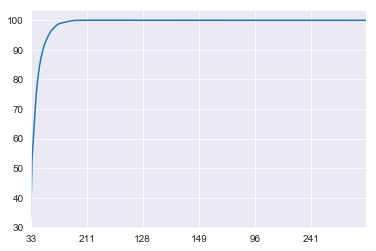

In [42]:
s = scil.get_top_features_by_permutation_importance(data, model_lr_bagging_1, inverse_shuffle=False, scoring=scoring)
s.cumsum().plot()

## SequentialFeatureSelector

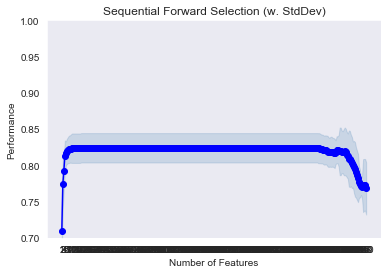

In [61]:
from mlxtend.feature_selection import SequentialFeatureSelector
from mlxtend.plotting import plot_sequential_feature_selection

sfs1 = SequentialFeatureSelector(model_lr, 
           k_features='parsimonious', #(10, 15), 
           forward=True, 
           floating=False, 
           verbose=0,
           scoring='roc_auc',
           cv=5,
          n_jobs=-1)

sfs1 = sfs1.fit(data.X_train, data.y_train)
fig1 = plot_sequential_feature_selection(sfs1.get_metric_dict(), kind='std_dev')

plt.ylim([0.7, 1])
plt.title('Sequential Forward Selection (w. StdDev)')
plt.grid()
plt.show()

In [85]:
np.mean(cross_val_score(model_lr, data.X_train, data.y_train, scoring=scoring, cv=RepeatedStratifiedKFold(5, 9)))

0.7360195360195361

In [101]:
cols = list(sfs1.subsets_[20]['feature_names'])
data_sub = scil.Data(data.X[cols], data.y, data.X_train[cols], data.y_train, data.X_test[cols], data.y_test)

In [51]:
eli5.show_weights(model_lr, top=30)

Weight?,Feature
+0.520,x227
+0.398,x262
+0.200,x111
+0.111,x211
+0.095,x4
+0.070,x129
+0.041,x94
+0.038,x193
+0.032,x46
+0.009,x178
